In [42]:
import pandas as pd
import seaborn as sns
import numpy as np
import plotly.express as px
import json
import fix_vaxs
import unidecode
from matplotlib import pyplot as plt
from scipy.stats import norm
from sklearn.cluster import KMeans
custom_params = {"axes.spines.right": False, "axes.spines.top": False}
sns.set_theme(style = "ticks", rc = custom_params)

In [43]:
vax_df      =  pd.read_csv("datasets/dados_vacinacao.csv")
casos_br_df =  pd.read_csv("datasets/dados_br.csv")
casos_pb_df =  pd.read_csv("datasets/dados_pb.csv")

In [44]:
mean_confirmed = np.mean(casos_pb_df['confirmed'])
std_confirmed = np.std(casos_pb_df['confirmed'])

mean_deaths = np.mean(casos_pb_df['deaths'])
std_deaths = np.std(casos_pb_df['deaths'])

mean_pop = np.mean(casos_pb_df['estimated_population'])
std_pop = np.std(casos_pb_df['estimated_population'])

mean_100k = np.mean(casos_pb_df['confirmed_per_100k_inhabitants'])
std_100k = np.std(casos_pb_df['confirmed_per_100k_inhabitants'])

mean_dth_rt = np.mean(casos_pb_df['death_rate'])
std_dth_rt = np.std(casos_pb_df['death_rate'])

mean_pib = np.mean(casos_pb_df['pib_per_capita'])
std_pib = np.std(casos_pb_df['pib_per_capita'])

mean_density = np.mean(casos_pb_df['demographic_density'])
std_density = np.std(casos_pb_df['demographic_density'])

confirmed_norm = pd.Series(norm.cdf(casos_pb_df['confirmed'], loc = mean_confirmed , scale = std_confirmed))
deaths_norm = pd.Series(norm.cdf(casos_pb_df['deaths'], loc = mean_deaths, scale = std_deaths))
population_norm = pd.Series(norm.cdf(casos_pb_df['estimated_population'], loc = mean_pop, scale = std_pop))
cp100k_norm = pd.Series(norm.cdf(casos_pb_df['confirmed_per_100k_inhabitants'], loc = mean_100k, scale = std_100k))
dth_rt_norm = pd.Series(norm.cdf(casos_pb_df['death_rate'], loc = mean_dth_rt, scale = std_dth_rt))
pib_norm = pd.Series(norm.cdf(casos_pb_df['pib_per_capita'], loc = mean_pib, scale = std_pib))
density_norm = pd.Series(norm.cdf(casos_pb_df['demographic_density'], loc = mean_density, scale = std_density))

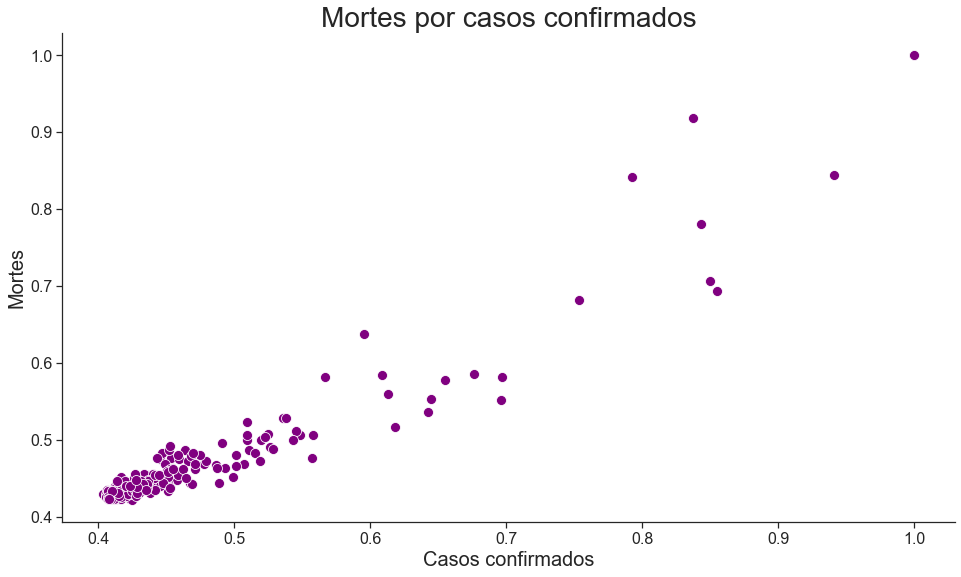

In [45]:
 g1 = sns.scatterplot(x = confirmed_norm, y = deaths_norm, color = 'purple',  s = 100)
 g1.set_title('Mortes por casos confirmados',  fontsize = 28)
 g1.set_xlabel('Casos confirmados', fontsize = 20)
 g1.set_ylabel('Mortes', fontsize = 20)
 g1.figure.set_size_inches(16, 9)
 g1.tick_params(labelsize = 16)

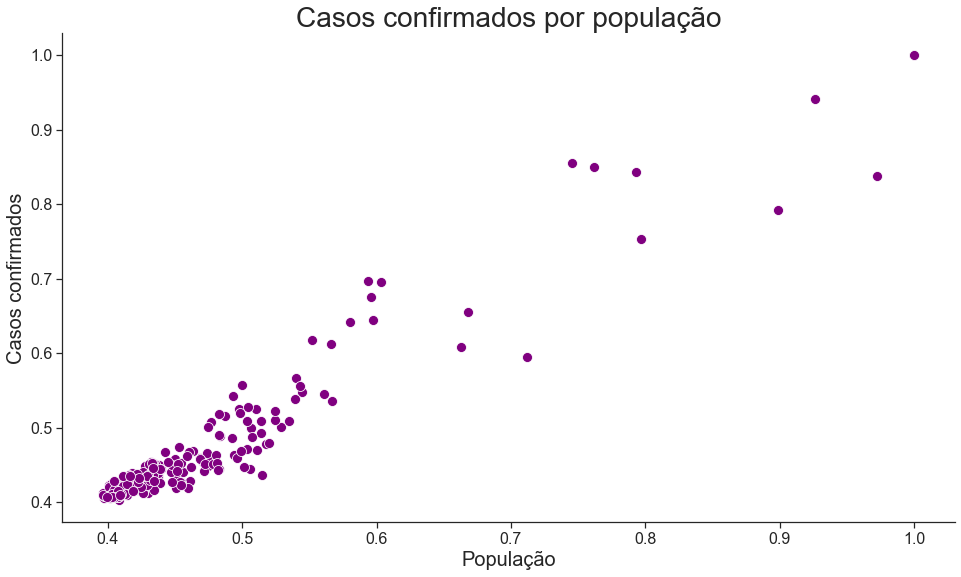

In [46]:
 g2 = sns.scatterplot(x = population_norm, y = confirmed_norm, color = 'purple',  s = 100)
 g2.set_title('Casos confirmados por população',  fontsize = 28)
 g2.set_xlabel('População', fontsize = 20)
 g2.set_ylabel('Casos confirmados', fontsize = 20)
 g2.figure.set_size_inches(16, 9)
 g2.tick_params(labelsize = 16)

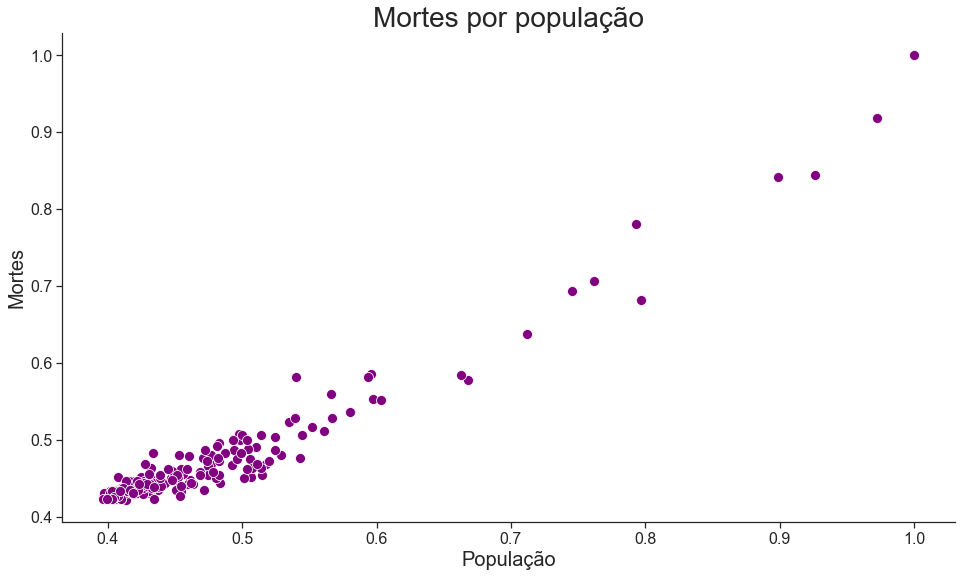

In [47]:
 g3 = sns.scatterplot(x = population_norm, y = deaths_norm, color = 'purple',  s = 100)
 g3.set_title('Mortes por população',  fontsize = 28)
 g3.set_xlabel('População', fontsize = 20)
 g3.set_ylabel('Mortes', fontsize = 20)
 g3.figure.set_size_inches(16, 9)
 g3.tick_params(labelsize = 16)

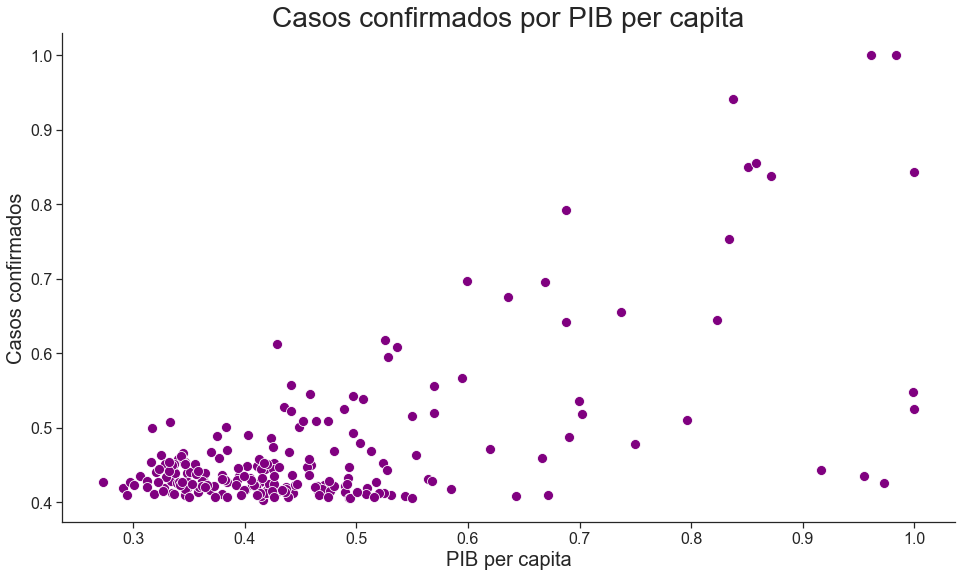

In [48]:
 g4 = sns.scatterplot(x = pib_norm, y = confirmed_norm, color = 'purple',  s = 100)
 g4.set_title('Casos confirmados por PIB per capita',  fontsize = 28)
 g4.set_xlabel('PIB per capita', fontsize = 20)
 g4.set_ylabel('Casos confirmados', fontsize = 20)
 g4.figure.set_size_inches(16, 9)
 g4.tick_params(labelsize = 16)

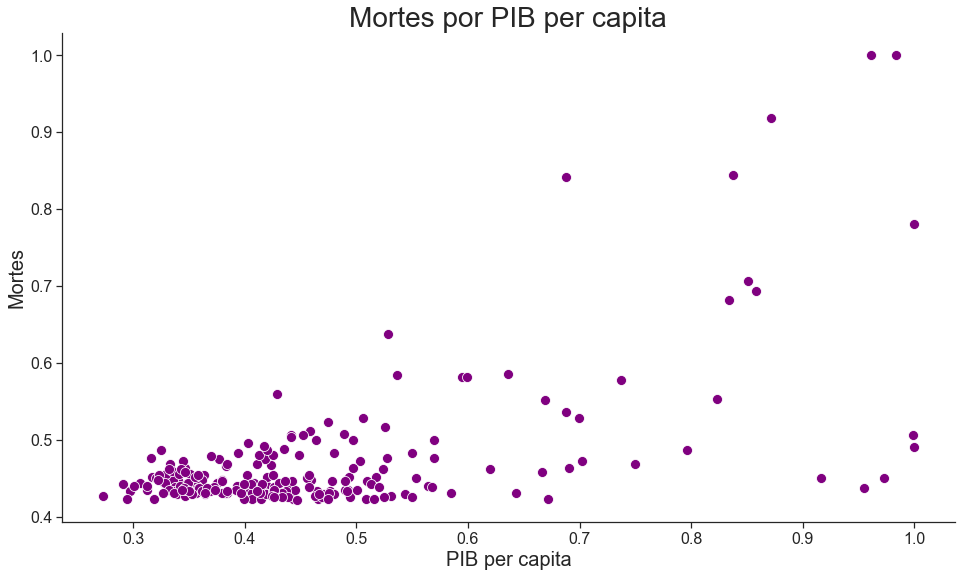

In [49]:
 g5 = sns.scatterplot(x = pib_norm, y = deaths_norm, color = 'purple',  s = 100)
 g5.set_title('Mortes por PIB per capita',  fontsize = 28)
 g5.set_xlabel('PIB per capita', fontsize = 20)
 g5.set_ylabel('Mortes', fontsize = 20)
 g5.figure.set_size_inches(16, 9)
 g5.tick_params(labelsize = 16)

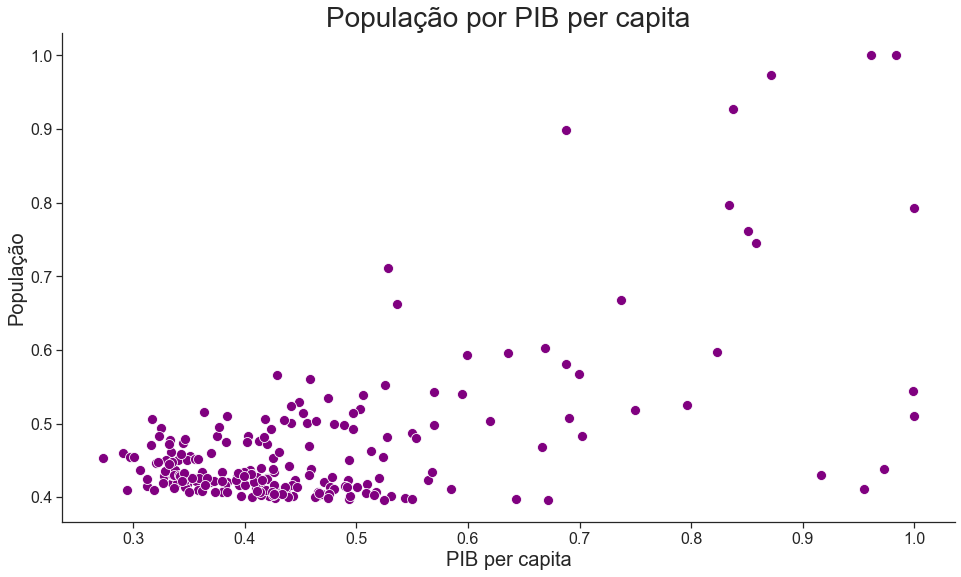

In [50]:
 g6 = sns.scatterplot(x = pib_norm, y = population_norm, color = 'purple',  s = 100)
 g6.set_title('População por PIB per capita',  fontsize = 28)
 g6.set_xlabel('PIB per capita', fontsize = 20)
 g6.set_ylabel('População', fontsize = 20)
 g6.figure.set_size_inches(16, 9)
 g6.tick_params(labelsize = 16)

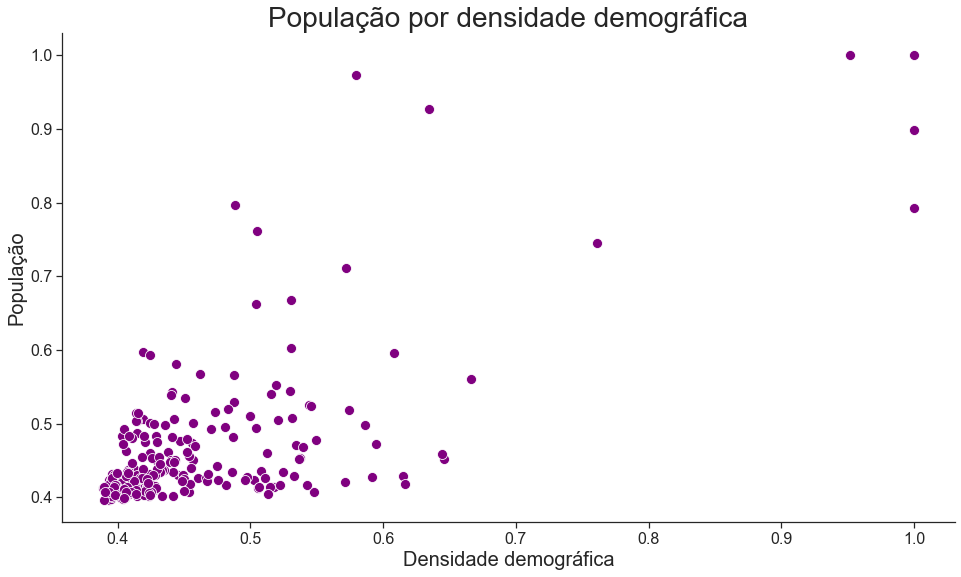

In [51]:
 g7 = sns.scatterplot(x = density_norm, y = population_norm, color = 'purple',  s = 100)
 g7.set_title('População por densidade demográfica',  fontsize = 28)
 g7.set_xlabel('Densidade demográfica', fontsize = 20)
 g7.set_ylabel('População', fontsize = 20)
 g7.figure.set_size_inches(16, 9)
 g7.tick_params(labelsize = 16)

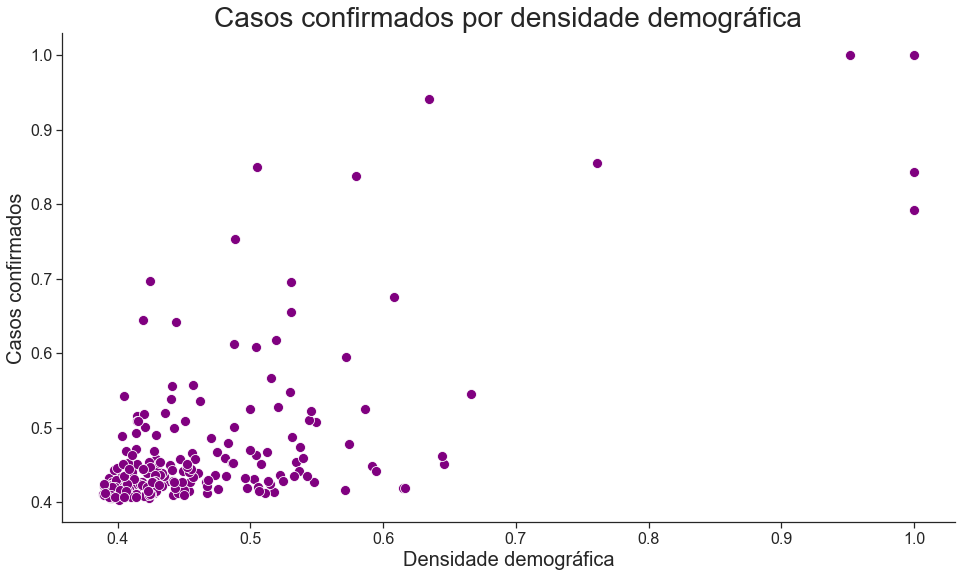

In [52]:
 g8 = sns.scatterplot(x = density_norm, y = confirmed_norm, color = 'purple',  s = 100)
 g8.set_title('Casos confirmados por densidade demográfica',  fontsize = 28)
 g8.set_xlabel('Densidade demográfica', fontsize = 20)
 g8.set_ylabel('Casos confirmados', fontsize = 20)
 g8.figure.set_size_inches(16, 9)
 g8.tick_params(labelsize = 16)

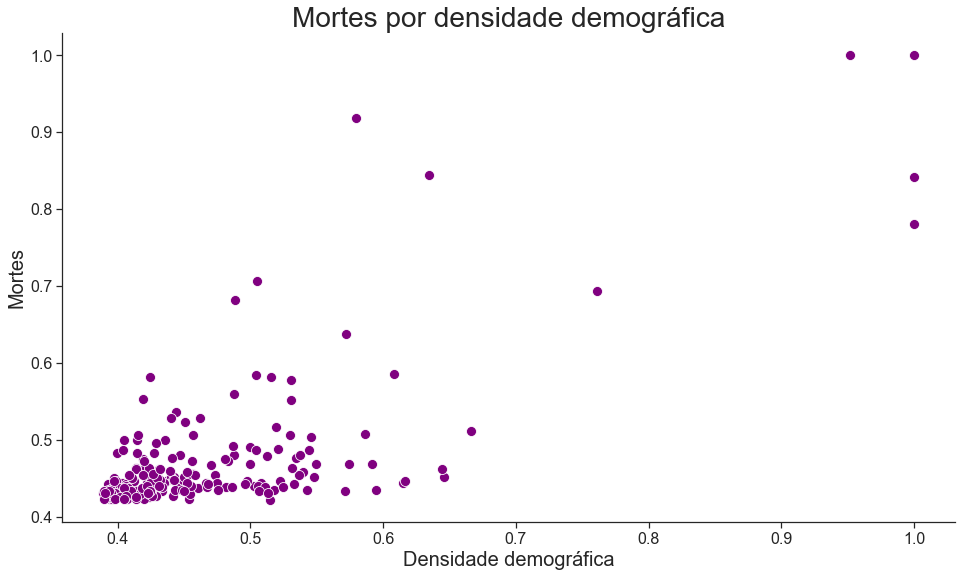

In [53]:
 g9 = sns.scatterplot(x = density_norm, y = deaths_norm, color = 'purple',  s = 100)
 g9.set_title('Mortes por densidade demográfica',  fontsize = 28)
 g9.set_xlabel('Densidade demográfica', fontsize = 20)
 g9.set_ylabel('Mortes', fontsize = 20)
 g9.figure.set_size_inches(16, 9)
 g9.tick_params(labelsize = 16)

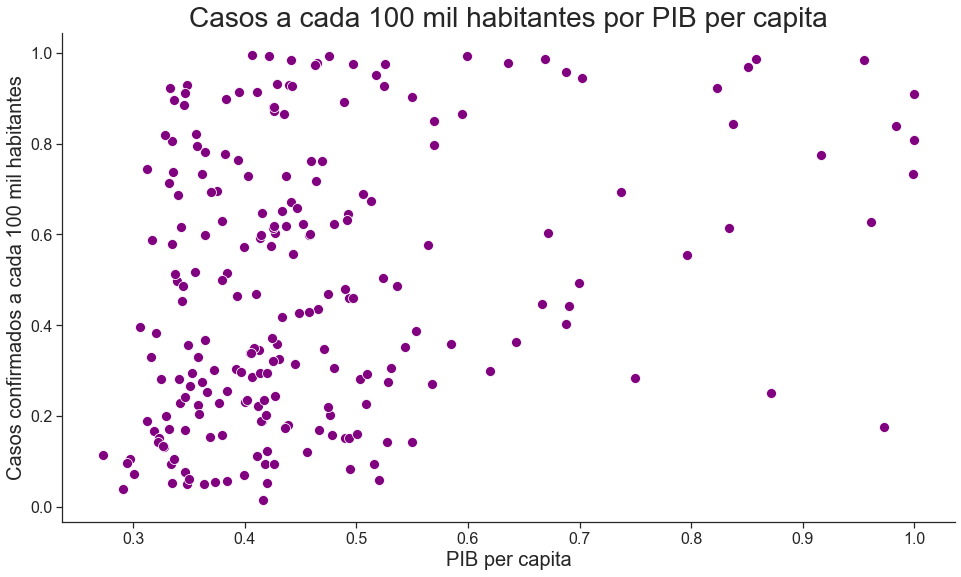

In [54]:
 g10 = sns.scatterplot(x = pib_norm, y = cp100k_norm, color = 'purple',  s = 100)
 g10.set_title('Casos a cada 100 mil habitantes por PIB per capita',  fontsize = 28)
 g10.set_xlabel('PIB per capita', fontsize = 20)
 g10.set_ylabel('Casos confirmados a cada 100 mil habitantes', fontsize = 20)
 g10.figure.set_size_inches(16, 9)
 g10.tick_params(labelsize = 16)

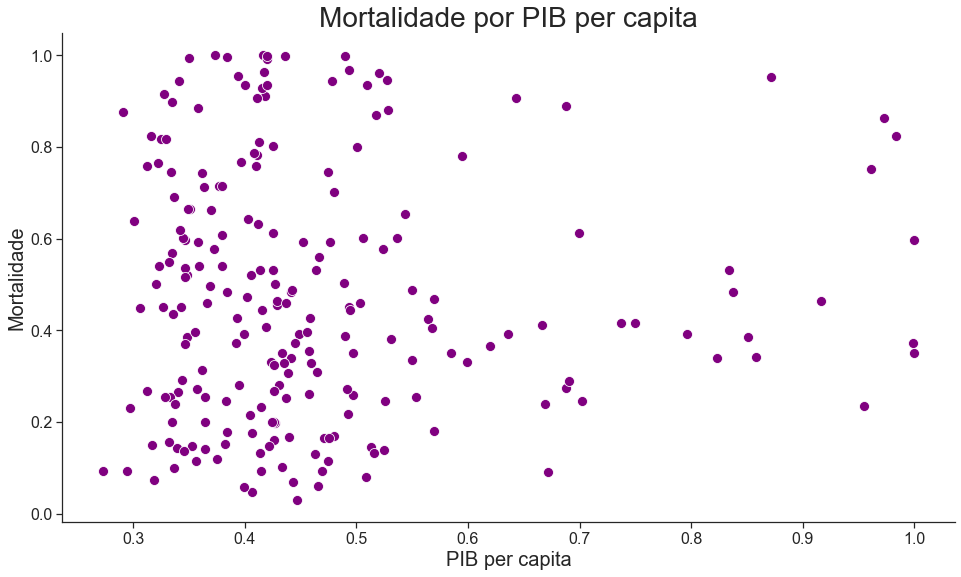

In [55]:
 g11 = sns.scatterplot(x = pib_norm, y = dth_rt_norm, color = 'purple',  s = 100)
 g11.set_title('Mortalidade por PIB per capita',  fontsize = 28)
 g11.set_xlabel('PIB per capita', fontsize = 20)
 g11.set_ylabel('Mortalidade', fontsize = 20)
 g11.figure.set_size_inches(16, 9)
 g11.tick_params(labelsize = 16)

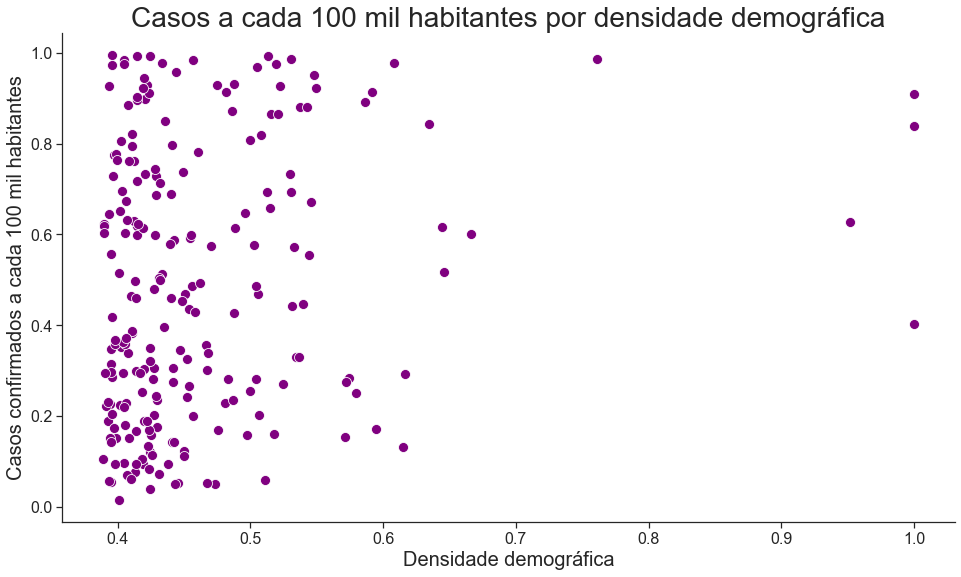

In [56]:
 g12 = sns.scatterplot(x = density_norm, y = cp100k_norm, color = 'purple',  s = 100)
 g12.set_title('Casos a cada 100 mil habitantes por densidade demográfica',  fontsize = 28)
 g12.set_xlabel('Densidade demográfica', fontsize = 20)
 g12.set_ylabel('Casos confirmados a cada 100 mil habitantes', fontsize = 20)
 g12.figure.set_size_inches(16, 9)
 g12.tick_params(labelsize = 16)

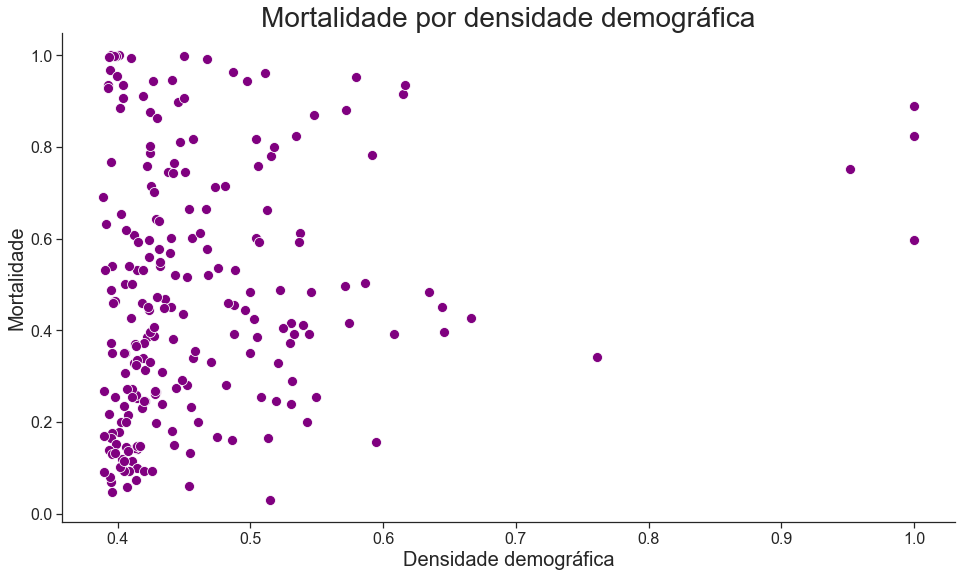

In [57]:
 g13 = sns.scatterplot(x = density_norm, y = dth_rt_norm, color = 'purple',  s = 100)
 g13.set_title('Mortalidade por densidade demográfica',  fontsize = 28)
 g13.set_xlabel('Densidade demográfica', fontsize = 20)
 g13.set_ylabel('Mortalidade', fontsize = 20)
 g13.figure.set_size_inches(16, 9)
 g13.tick_params(labelsize = 16)

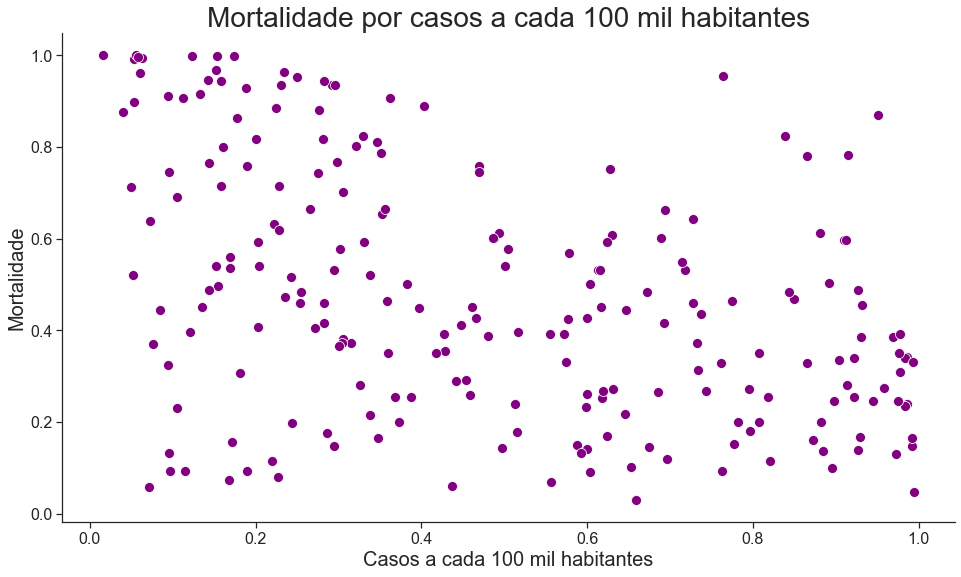

In [58]:
 g14 = sns.scatterplot(x = cp100k_norm, y = dth_rt_norm, color = 'purple',  s = 100)
 g14.set_title('Mortalidade por casos a cada 100 mil habitantes',  fontsize = 28)
 g14.set_xlabel('Casos a cada 100 mil habitantes', fontsize = 20)
 g14.set_ylabel('Mortalidade', fontsize = 20)
 g14.figure.set_size_inches(16, 9)
 g14.tick_params(labelsize = 16)

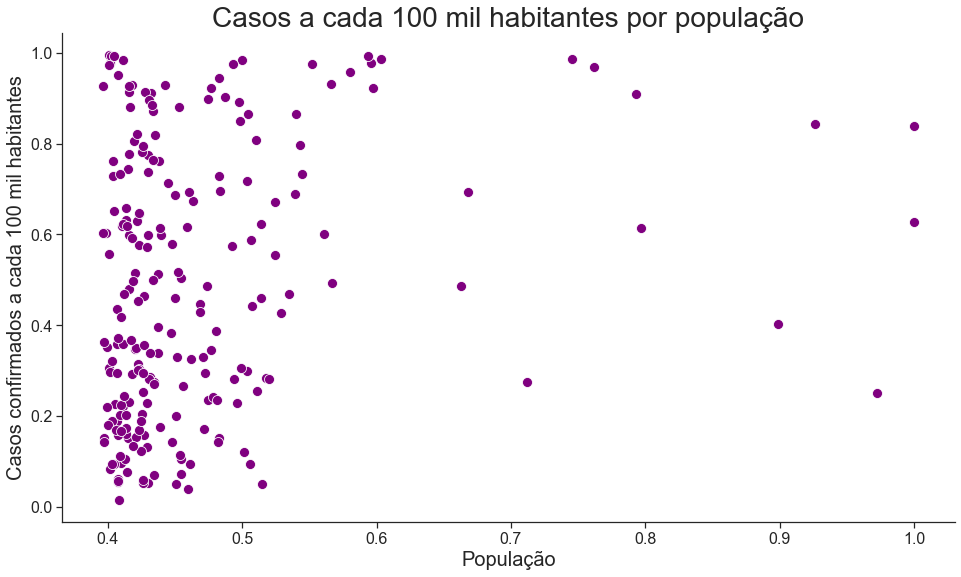

In [59]:
 g15 = sns.scatterplot(x = population_norm, y = cp100k_norm, color = 'purple',  s = 100)
 g15.set_title('Casos a cada 100 mil habitantes por população',  fontsize = 28)
 g15.set_xlabel('População', fontsize = 20)
 g15.set_ylabel('Casos confirmados a cada 100 mil habitantes', fontsize = 20)
 g15.figure.set_size_inches(16, 9)
 g15.tick_params(labelsize = 16)

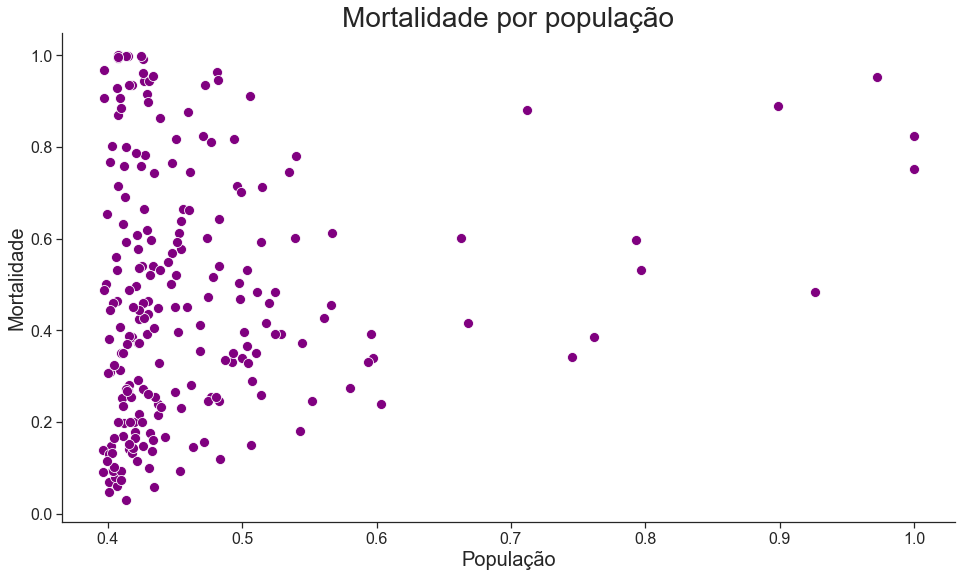

In [60]:
 g16 = sns.scatterplot(x = population_norm, y = dth_rt_norm, color = 'purple',  s = 100)
 g16.set_title('Mortalidade por população',  fontsize = 28)
 g16.set_xlabel('População', fontsize = 20)
 g16.set_ylabel('Mortalidade', fontsize = 20)
 g16.figure.set_size_inches(16, 9)
 g16.tick_params(labelsize = 16)

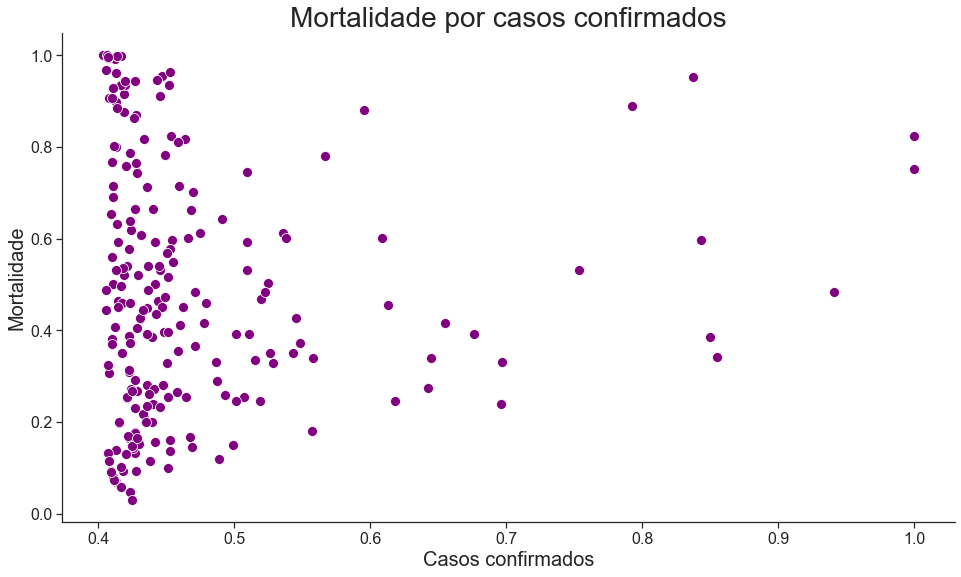

In [61]:
 g17 = sns.scatterplot(x = confirmed_norm, y = dth_rt_norm, color = 'purple',  s = 100)
 g17.set_title('Mortalidade por casos confirmados',  fontsize = 28)
 g17.set_xlabel('Casos confirmados', fontsize = 20)
 g17.set_ylabel('Mortalidade', fontsize = 20)
 g17.figure.set_size_inches(16, 9)
 g17.tick_params(labelsize = 16)